In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# https://www.kaggle.com/datasets/bhavyajha04/taxi-tip-prediction-dataset/data
df = pd.read_csv('./../data/yellowTripData.csv')

In [28]:
df = df.dropna()

In [29]:
df.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,tip_amount,tolls_amount,congestion_surcharge
count,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06,2.713009e+06
mean,1.560074e+00,3.105965e+00,1.647219e+02,1.630840e+02,1.359003e+01,1.202093e+00,3.242546e+00,4.359408e-01,2.365093e+00
std,1.212404e+00,3.947767e+00,6.576542e+01,6.982324e+01,1.208580e+01,1.283133e+00,2.721385e+00,1.736569e+00,5.648453e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,-2.650000e+01,1.000000e-02,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.040000e+00,1.320000e+02,1.130000e+02,7.000000e+00,0.000000e+00,1.850000e+00,0.000000e+00,2.500000e+00
50%,1.000000e+00,1.710000e+00,1.620000e+02,1.620000e+02,9.500000e+00,5.000000e-01,2.460000e+00,0.000000e+00,2.500000e+00
75%,2.000000e+00,3.160000e+00,2.340000e+02,2.340000e+02,1.500000e+01,2.500000e+00,3.560000e+00,0.000000e+00,2.500000e+00
max,9.000000e+00,1.927100e+02,2.650000e+02,2.650000e+02,4.622400e+02,1.850000e+01,1.300000e+02,8.000000e+01,2.750000e+00


In [15]:
df = df.drop(columns=['VendorID', 'RatecodeID', 'payment_type', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'mta_tax', 'improvement_surcharge', 'total_amount'], axis=1)

In [19]:
df = df[df['tip_amount'] > 0]
df = df[df['tip_amount'] <= df['fare_amount']]

In [22]:
correlations = df.corr()['tip_amount'].drop('tip_amount')
correlations

passenger_count         0.007897
trip_distance           0.806299
PULocationID           -0.080117
DOLocationID           -0.082799
fare_amount             0.869835
extra                  -0.019080
tolls_amount            0.651026
congestion_surcharge   -0.211711
Name: tip_amount, dtype: float64

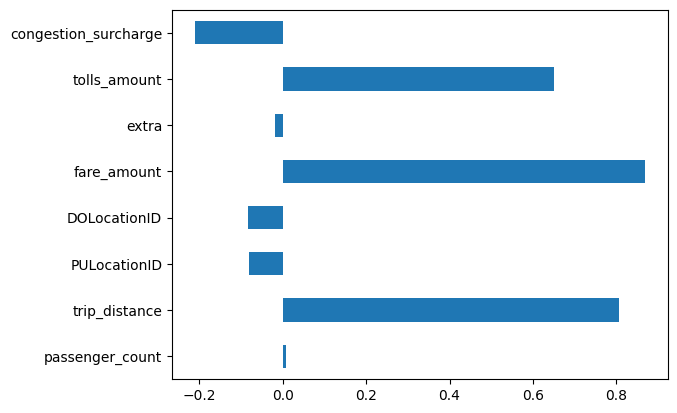

In [23]:
correlations.plot(kind='barh')
plt.show()


In [24]:
X = df.drop(['tip_amount'], axis=1).values
y = df['tip_amount'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeRegressor

criterion = 'squared_error'
max_depth = 10
model = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

Mean Squared Error: 1.7101052197680315
R^2: 0.7723858261834281
